In [1]:
import nappy.nappy_api
import pandas as pd 
# import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import calendar
import matplotlib.dates as mdates


In [2]:
adjusted_csv_path_spl = os.path.join(os.getcwd(), 'final_adjusted_2011_2024.csv')

def adjusted_coefficients(csv_file):
    
    date = []
    starttime = []
    scattering_coeff = []
    absorption_coeff = []
    absorption_angstrom = []
    scattering_angstrom = []
    
    adjusted_csv = pd.read_csv(csv_file, header=0) 
    
    adjusted_csv.replace([99999.99, 9999.99, 999.999999, 999.99, 99.999, 9.999, 999.57], np.NaN, inplace=True)  
      
    
    for selected_columns in adjusted_csv.columns:
        
        if selected_columns.startswith('pm1'):
            variable = selected_columns.find('_') + 1
            end_variable = selected_columns.find('_', variable)
            selected_variable = selected_columns[variable: end_variable]
            
            if selected_variable == 'scattering':

                variable = selected_columns.find('angstrom')
                            
                if variable == -1:
                    scattering_coeff.append(selected_columns)
                    
                else:
                    scattering_angstrom.append(selected_columns)
        
            else: 
                variable = selected_columns.find('angstrom')
                
                if variable == -1:
                    absorption_coeff.append(selected_columns)
                    
                else:
                    absorption_angstrom.append(selected_columns)
                    
        elif selected_columns.startswith('starttime'):
            # print(selected_columns)
            starttime.append(selected_columns)
            
        elif selected_columns.startswith('Date'):
            date.append(selected_columns)
                
                
    return starttime, scattering_coeff, date, adjusted_csv
    
adjusted_coefficients(adjusted_csv_path_spl)

(['starttime'],
 ['pm10_scattering_coeff_450',
  'pm10_scattering_coeff_550',
  'pm10_scattering_coeff_700',
  'pm1_scattering_coeff_450',
  'pm1_scattering_coeff_550',
  'pm1_scattering_coeff_700'],
 ['Date'],
         starttime                 Date  pm10_scattering_coeff_450  \
 0        24.00000  2011-01-24 00:00:00                       2.17   
 1        24.04167  2011-01-24 01:00:00                        NaN   
 2        24.08333  2011-01-24 02:00:00                        NaN   
 3        24.12500  2011-01-24 03:00:00                        NaN   
 4        24.16667  2011-01-24 04:00:00                        NaN   
 ...           ...                  ...                        ...   
 113785  366.79167  2024-12-31 19:00:00                       4.10   
 113786  366.83333  2024-12-31 20:00:00                       4.91   
 113787  366.87500  2024-12-31 21:00:00                       3.93   
 113788  366.91667  2024-12-31 22:00:00                       5.10   
 113789  366.95833 

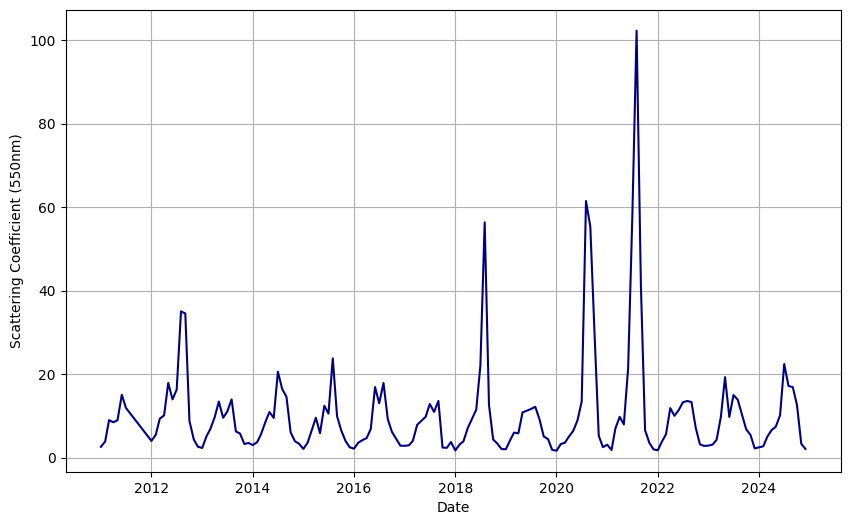

In [3]:
def date_plot(variables):
    
    if len(variables) > 3 and isinstance(variables[3], pd.DataFrame):
        dataframe = variables[3]
    else:
        raise ValueError("Expected a DataFrame at index 3 in variables.")
                        
    df = dataframe.dropna()
    # print(df)
    
    # print(df[df['pm10_scattering_coeff_450'] == df['pm10_scattering_coeff_450'].max()])
                        
    df = df[['Date','pm10_scattering_coeff_550']]
    df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
    
    df = df.groupby('Date')['pm10_scattering_coeff_550'].mean().reset_index()

    plt.figure(figsize=(10,6))
    plt.plot(pd.to_datetime(df['Date']), df['pm10_scattering_coeff_550'], color='navy')
    plt.xlabel('Date')
    plt.ylabel('Scattering Coefficient (550nm)')
    plt.grid()
    plt.show()
    
values = adjusted_coefficients(adjusted_csv_path_spl)
date_plot(values)


In [4]:
adjusted_csv_path_table_mt = os.path.join(os.getcwd(), 'table_mountain_2019_2024_aerosol_data.csv')

def adjusted_coefficients(csv_file):
    
    date = []
    starttime = []
    scattering_coeff = []
    absorption_coeff = []
    absorption_angstrom = []
    scattering_angstrom = []
    
    adjusted_csv = pd.read_csv(csv_file, header=0) 
    
    adjusted_csv.replace([99999.99, 9999.99, 999.999999, 999.99, 99.999, 9.999, 999.57], np.NaN, inplace=True)  
      
    
    for selected_columns in adjusted_csv.columns:
        
        if selected_columns.startswith('pm1'):

            variable = selected_columns.find('_') + 1
            end_variable = selected_columns.find('_', variable)
            selected_variable = selected_columns[variable: end_variable]

            if selected_variable == 'scattering':

                variable = selected_columns.find('angstrom')
                            
                if variable == -1:
                    scattering_coeff.append(selected_columns)
                    
                else:
                    scattering_angstrom.append(selected_columns)
        
            else: 
                variable = selected_columns.find('angstrom')
                
                if variable == -1:
                    absorption_coeff.append(selected_columns)
                    
                else:
                    absorption_angstrom.append(selected_columns)
                    
        elif selected_columns.startswith('starttime'):

            starttime.append(selected_columns)
            
        elif selected_columns.startswith('date'):
            date.append(selected_columns)
                
                
    return starttime, scattering_coeff, date, adjusted_csv
    
adjusted_coefficients(adjusted_csv_path_table_mt)

(['starttime'],
 ['pm1_scattering_coeff_450',
  'pm1_scattering_coeff_550',
  'pm1_scattering_coeff_700',
  'pm10_scattering_coeff_450',
  'pm10_scattering_coeff_550',
  'pm10_scattering_coeff_700'],
 ['date'],
        starttime                 date  pm1_absorption_coeff_450  \
 0      253.00000  2019-09-10 00:00:00                      8.38   
 1      253.04167  2019-09-10 01:00:00                      8.12   
 2      253.08333  2019-09-10 02:00:00                      8.34   
 3      253.12500  2019-09-10 03:00:00                      7.75   
 4      253.16667  2019-09-10 04:00:00                      7.73   
 ...          ...                  ...                       ...   
 46555  366.79167  2024-12-31 19:00:00                      1.14   
 46556  366.83333  2024-12-31 20:00:00                      1.41   
 46557  366.87500  2024-12-31 21:00:00                      1.83   
 46558  366.91667  2024-12-31 22:00:00                      2.01   
 46559  366.95833  2024-12-31 23:00:00   

In [5]:
def date_plot(variables):
    
    if len(variables) > 3 and isinstance(variables[3], pd.DataFrame):
        dataframe = variables[3]
    else:
        raise ValueError("Expected a DataFrame at index 3 in variables.")
                        
    df = dataframe.dropna()

    df.columns = df.columns.str.strip().str.lower()
            
    df = df[['date','pm10_scattering_coeff_550']]
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
    
    df = df.groupby('date')['pm10_scattering_coeff_550'].mean().reset_index()
    return df
    
    # for year in [2018, 2020, 2021]:
    #     year_df = df[df['Date'].str.slice(0,4) == str(year)]
    #     plt.figure(figsize=(10,6))
    #     plt.plot(pd.to_datetime(year_df['Date']), year_df['pm10_scattering_coeff_450'])
    #     plt.title(f'Scattering Coefficient (450nm) time series in {year}')
    #     plt.xlabel('Date')
    #     plt.ylabel('Scattering Coefficient (450nm)')
    #     plt.grid()
    #     plt.show()
    
values1 = adjusted_coefficients(adjusted_csv_path_table_mt)
date_plot(values1)

,date,pm10_scattering_coeff_550
0,2019-09,17.405714
1,2019-10,13.996869
2,2019-11,20.347646
3,2019-12,14.034274
4,2020-01,11.091366
...,...,...
59,2024-08,27.905161
60,2024-09,18.383430
61,2024-10,26.467119
62,2024-11,11.625738


<class 'pandas.core.frame.DataFrame'>


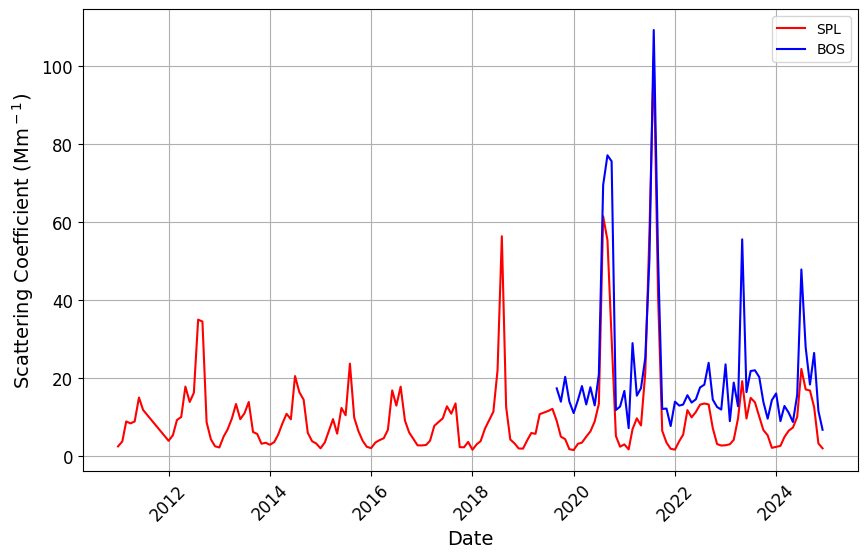

In [22]:
values1 = adjusted_coefficients(adjusted_csv_path_table_mt)
table_mt_plot = date_plot(values1)
print(type(table_mt_plot))

values = adjusted_coefficients(adjusted_csv_path_spl)
spl_plot = date_plot(values)

spl_plot["date"] = pd.to_datetime(spl_plot["date"])
table_mt_plot["date"] = pd.to_datetime(table_mt_plot["date"])

merged_df = spl_plot.merge(table_mt_plot, on="date", how="outer")
x = merged_df["date"]

y1 = merged_df["pm10_scattering_coeff_550_x"] 
y2 = merged_df["pm10_scattering_coeff_550_y"]


plt.figure(figsize=(10,6))
plt.plot(x, y1, label='SPL', color='red', linestyle='-')
plt.plot(x, y2, label='BOS', color='blue', linestyle='-')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Scattering Coefficient (Mm$^-$$^1$)', fontsize = 14)
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()
